<a href="https://colab.research.google.com/github/Ruchit22solanki/Minimum-Wireless-Charger-Placement-with-Individual-Energy-Requirement/blob/main/PIO_relaxrounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 
import math
import matplotlib.pyplot as plt 
import cvxpy as cp
import numpy as np

In [ ]:
class Sensor :
  count_sensors=0
  total_sensors=50
  def __init__(self,x,y,req_charging_level,charging_level=0):
    self.x=x
    self.y=y
    self.req_charging=req_charging_level
    self.curr_charging=0

  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)

  def __str__(self):
    return f"x={self.x},y={self.y},,req_charing_level={self.req_charging}"
    
  def dist(self,point):
    return math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)



In [ ]:
class Charger :
  charger_energy=1000
  redius=70
  min_power=(2.5*charger_energy)/((redius+15)**2)
  total_chargers=1000
  def __init__(self,x,y):
    self.x=x
    self.y=y
  
  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)
    
  def charging_level(self,point):
    dist=math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)
    p_rx=(2.5*self.charger_energy)/((dist+15)**2)
    p_in=-0.00001*(p_rx**2)+0.57*p_rx+10
    return p_in//self.min_power 

  def __str__(self):
    return f"x={self.x},y={self.y}"

  def check_dist(self,point):
    return (math.sqrt((self.x-point.x)**2+(self.y-point.y)**2))<=self.redius

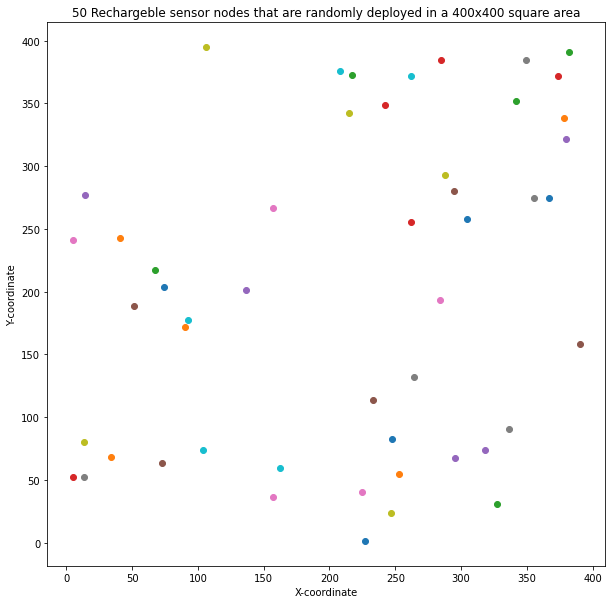

In [ ]:
area=400
sensors=set()
while len(sensors)<Sensor.total_sensors:
  x_coordinate=random.uniform(0,area)
  y_coordinate=random.uniform(0,area)
  req_charging=round(random.uniform(10,20))
  sensors.add(Sensor(x_coordinate,y_coordinate,req_charging))

plt.figure(figsize=(10, 10))
for items in sensors:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Sensor.total_sensors} Rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show() 


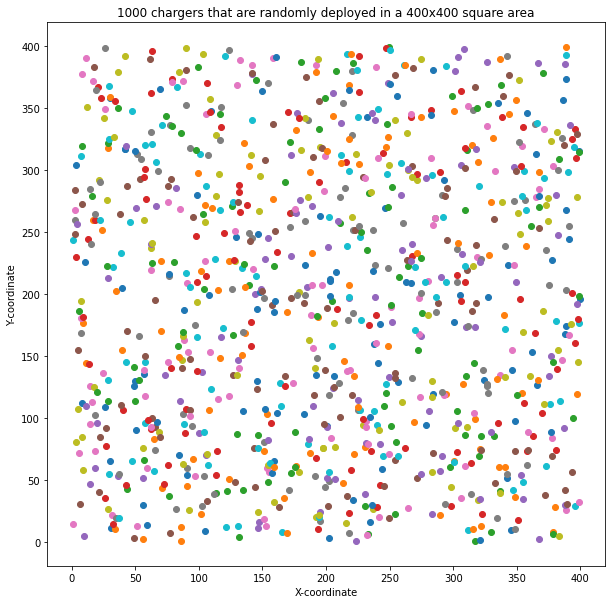

In [ ]:
chargers=set()
while len(chargers)<Charger.total_chargers:
    x=random.uniform(0,area)
    y=random.uniform(0,area)
    charger=Charger(x,y)
    chargers.add(charger)

plt.figure(figsize=(10, 10))
for items in chargers:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Charger.total_chargers} chargers that are randomly deployed in a {area}x{area} square area")
plt.show()   


In [ ]:
X=cp.Variable(shape=(Charger.total_chargers,1),name="X")
alpha=np.zeros((Sensor.total_sensors,1),dtype=int)

i=0
for items in sensors:
  alpha[i]=items.req_charging
  i+=1

L=np.zeros((Sensor.total_sensors,Charger.total_chargers),dtype=int)

i=0
for items in sensors:
  j=0
  for charger in chargers:
    if charger.check_dist(items):
      L[i][j]=charger.charging_level(items)
    j+=1
  i+=1

In [ ]:
constraints=[L*X>=alpha,X<=1,X>=0]
objective=cp.Minimize(cp.sum(X,axis=0))
problem = cp.Problem(objective, constraints)
problem.solve()
print("status:", problem.status)
print("optimal value", problem.value)




status: optimal
optimal value 4.662585167083931


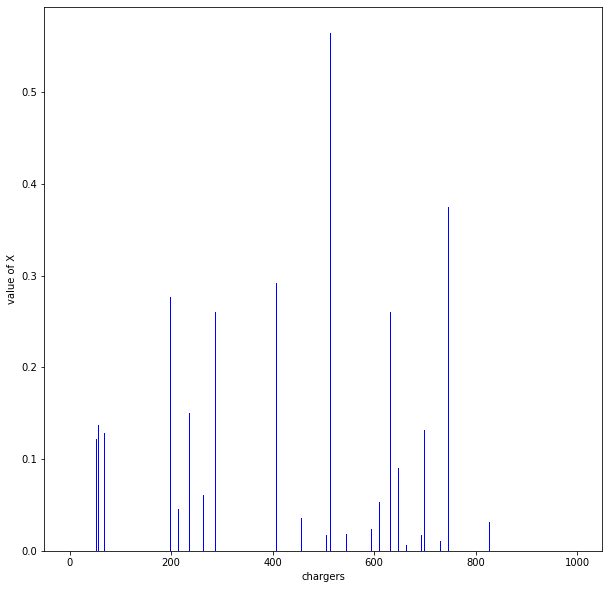

In [ ]:
fig = plt.figure(figsize = (10, 10)) 

for i in range(Charger.total_chargers):
  plt.bar(i, X[i].value, color ='blue',  
        width = 1) 
  
plt.xlabel("chargers") 
plt.ylabel("value of X") 
plt.show() 

In [ ]:
opt_X=[]
for i in range(Charger.total_chargers):
  opt_X.append((X[i].value,i))
opt_X.sort(reverse=True)


ans=list(chargers)
i=0
ans_chargers=set()
while Sensor.count_sensors<Sensor.total_sensors :
  nex=ans[opt_X[i][1]]
  i+=1
  ans_chargers.add(nex)
  for item in sensors:
    if nex.check_dist(item) and item.curr_charging<item.req_charging:
      L=nex.charging_level(item)
      if item.curr_charging+L>=item.req_charging:
        Sensor.count_sensors+=1
        item.curr_charging=item.req_charging
      else:
        item.curr_charging+=L
  if i>Charger.total_chargers:
    print(f"not enough chargers:{Sensor.total_sensors-Sensor.count_sensors} sensors still remained")
    break
    


number of chargers : 10


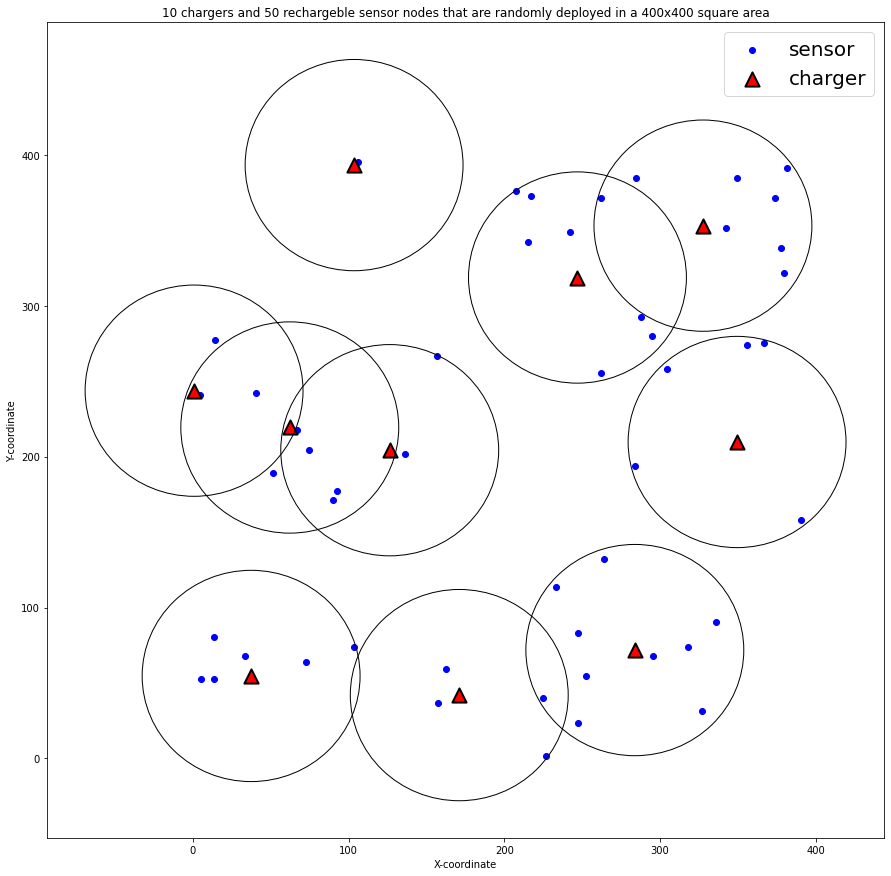

In [ ]:

print("number of chargers :",len(ans_chargers))
fig,ax = plt.subplots(figsize=(15, 15))
for items in sensors:
  plt1=plt.scatter(items.x, items.y,c='b') 


for item in ans_chargers:
  circle = plt.Circle((item.x, item.y),70, fill=False,color='black')
  ax.add_patch(circle)
  plt2=plt.scatter(item.x,item.y, c ='r',linewidths = 2,edgecolor="black" ,marker ="^",s = 200)   
plt.legend([plt1,plt2],["sensor","charger"],prop={'size':20})
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{len(ans_chargers)} chargers and {Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show()
